In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf

In [3]:
from plotly.offline import iplot

In [4]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
df_matches = pd.read_csv('/content/WorldCupMatches.csv')
df_players = pd.read_csv('/content/WorldCupPlayers.csv')
df_cups = pd.read_csv('/content/WorldCups.csv')

In [ ]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


Data Cleaning

In [ ]:
df_matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [7]:
df_matches.dropna(subset=['Year'],inplace=True)

In [8]:
df_matches.isnull().sum()


Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [9]:
names = df_matches[df_matches["Home Team Name"].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">Bosnia and Herzegovina    1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">United Arab Emirates      1
Name: Home Team Name, dtype: int64

In [10]:
names.index

Index(['rn">Republic of Ireland', 'rn">Bosnia and Herzegovina',
       'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
       'rn">United Arab Emirates'],
      dtype='object')

In [11]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">Bosnia and Herzegovina',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">United Arab Emirates']

In [12]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'Bosnia and Herzegovina',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'United Arab Emirates']

In [13]:
old = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new = ['Germany', 'Maracanã Stadium', 'Maracanã Stadium']

In [14]:
wrong = wrong+old
correct = correct + new

In [15]:
for index, wr in enumerate(wrong):
  df_matches = df_matches.replace(wrong[index],correct[index])

for index, wr in enumerate(wrong):
  df_players = df_players.replace(wrong[index],correct[index])

for index, wr in enumerate(wrong):
  df_cups = df_cups.replace(wrong[index],correct[index])

In [16]:
names = df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

Most Number of World Cup Winning Title

In [ ]:
winners = df_cups['Winner'].value_counts()

In [ ]:
winners

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
Spain        1
France       1
England      1
Name: Winner, dtype: int64

In [17]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [ ]:
enable_plotly_in_cell()
winners.iplot(kind="bar")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [ ]:
runner_up = df_cups['Runners-Up'].value_counts()

In [ ]:
enable_plotly_in_cell()
runner_up.iplot(kind="bar")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
third = df_cups['Third'].value_counts()

In [ ]:
enable_plotly_in_cell()
third.iplot(kind="bar")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
teams = pd.concat([winners,runner_up,third],axis=1)

In [ ]:
teams

,Winner,Runners-Up,Third
Brazil,5.0,2.0,2.0
Italy,4.0,2.0,1.0
Germany,4.0,4.0,4.0
Argentina,2.0,3.0,NaN
Uruguay,2.0,NaN,NaN
France,1.0,1.0,2.0
Spain,1.0,NaN,NaN
England,1.0,NaN,NaN
Netherlands,NaN,3.0,1.0
Czechoslovakia,NaN,2.0,NaN


In [ ]:
teams.fillna(0, inplace=True)
teams = teams.astype(int)

In [ ]:
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Argentina,2,3,0
Uruguay,2,0,0
France,1,1,2
Spain,1,0,0
England,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [ ]:
enable_plotly_in_cell()
teams.iplot(kind="bar", xTitle="Teams", yTitle="Count", title="FIFA World Cup")

Output hidden; open in https://colab.research.google.com to view.

Number of Goals Per Nation

In [ ]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
home = df_matches[['Home Team Name','Home Team Goals']].dropna()
away = df_matches[['Away Team Name','Away Team Goals']].dropna()


In [ ]:
goals = home.append(away, ignore_index= True)

In [ ]:
goals

,Home Team Name,Home Team Goals,Away Team Name,Away Team Goals
0,France,4.0,NaN,NaN
1,USA,3.0,NaN,NaN
2,Yugoslavia,2.0,NaN,NaN
3,Romania,3.0,NaN,NaN
4,Argentina,1.0,NaN,NaN
...,...,...,...,...
1699,NaN,NaN,Costa Rica,0.0
1700,NaN,NaN,Germany,7.0
1701,NaN,NaN,Argentina,0.0
1702,NaN,NaN,Netherlands,3.0


In [ ]:
home.columns = ["Countries","Goals"]
away.columns = home.columns

In [ ]:
goals = home.append(away, ignore_index=True)

In [ ]:
goals.head()

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0


In [ ]:
no_of_goals = goals.groupby("Countries")['Goals'].sum()

In [ ]:
no_of_goals

Countries
Algeria                  14.0
Angola                    1.0
Argentina               133.0
Australia                11.0
Austria                  43.0
                        ...  
United Arab Emirates      2.0
Uruguay                  80.0
Wales                     4.0
Yugoslavia               60.0
Zaire                     0.0
Name: Goals, Length: 82, dtype: float64

In [ ]:
no_of_goals.sort_values(by="Goals",ascending=False)

Countries
Germany                235.0
Brazil                 225.0
Argentina              133.0
Italy                  128.0
France                 108.0
                       ...  
Trinidad and Tobago      0.0
Dutch East Indies        0.0
Canada                   0.0
China PR                 0.0
Zaire                    0.0
Name: Goals, Length: 82, dtype: float64

In [ ]:
enable_plotly_in_cell()

no_of_goals.iplot(kind="bar")


Output hidden; open in https://colab.research.google.com to view.

Attendance, Number of Teams, Goals, and Matches per cup

In [ ]:
df_cups['Attendance'] = df_cups["Attendance"].str.replace(".","")

In [ ]:

world_cups = pd.read_csv('WorldCups.csv')
world_cups['Attendance'] = world_cups["Attendance"].str.replace(".","")


In [ ]:
for index, wr in enumerate(wrong):
    world_cups = world_cups.replace(wrong[index], correct[index])

In [ ]:
world_cups.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549


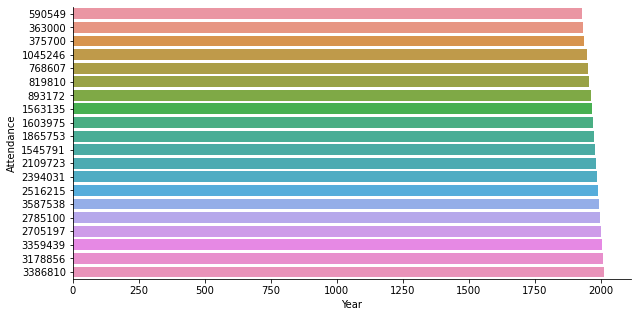

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.despine(right= True)
sns.barplot(x='Year', y='Attendance', data = world_cups)

In [ ]:
df_cups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [ ]:
df_cups.dropna(inplace=True)

In [ ]:
attendace = df_cups.groupby("Year")["Attendance"].sum()

In [ ]:
enable_plotly_in_cell()
attendace.iplot(kind="bar")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
attendace = pd.DataFrame([attendace],columns=['Year', 'Attendance'])

In [ ]:
attendace.head()

,Year,Attendance
Attendance,NaN,NaN


ValueError: ignored

In [ ]:
enable_plotly_in_cell()
df_cups.groupby("Year")["Attendance"].sum().iplot(kind="bar")


Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'Qualified Teams per Year')

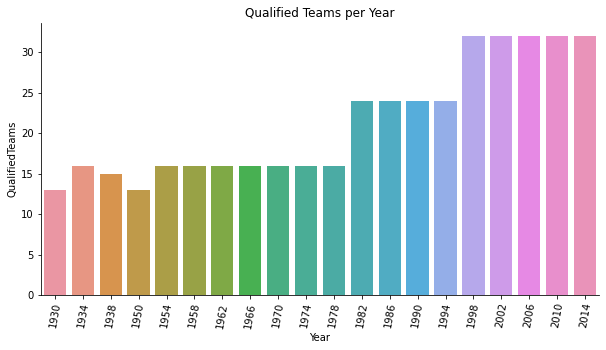

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams per Year')

Text(0.5, 1.0, 'Qualified Teams per Year')

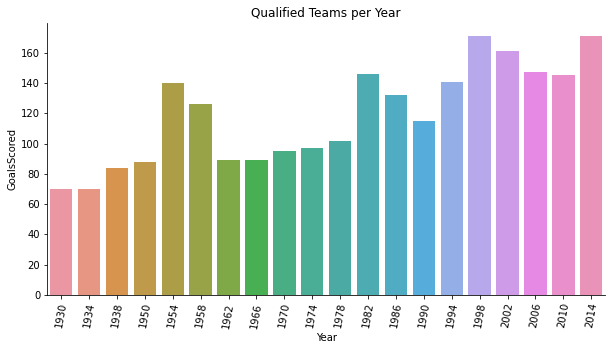

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored Teams per Year')

Text(0.5, 1.0, 'Mactches Played Teams per Year')

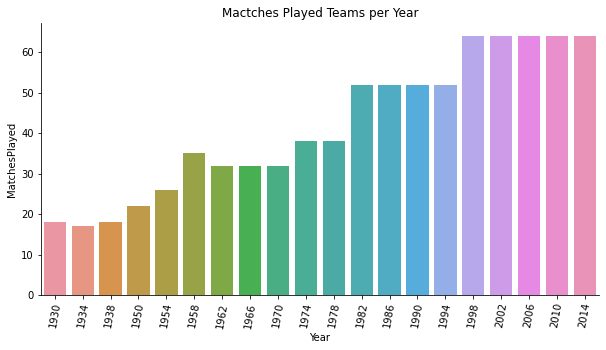

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Mactches Played Teams per Year')

Goals Per Team Per World Cup

In [ ]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


In [ ]:
world_cups.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2705197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3359439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3178856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810


In [ ]:
home = df_matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()

In [ ]:
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [ ]:
away =  df_matches.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()

In [ ]:
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [ ]:
goals = pd.concat([home,away],axis=1)

In [ ]:
goals.fillna(0, inplace= True)

In [ ]:
goals

Home Team Goals  Away Team Goals
1930.0 Argentina               16.0              2.0
       Belgium                  0.0              0.0
       Bolivia                  0.0              0.0
       Brazil                   4.0              1.0
       Chile                    4.0              1.0
...                             ...              ...
2014.0 Russia                   1.0              1.0
       Spain                    1.0              3.0
       Switzerland              4.0              3.0
       USA                      2.0              4.0
       Uruguay                  3.0              1.0

[427 rows x 2 columns]

In [ ]:
goals['Goals']=goals['Home Team Goals']+goals['Away Team Goals']

In [ ]:
goals=goals.drop(labels=['Home Team Goals', 'Away Team Goals'],axis =1)

In [ ]:
goals = goals.reset_index()

In [ ]:
goals=goals.drop(labels=['index'],axis =1)

In [ ]:
goals.head()

,level_0,level_1,Goals
0,1930.0,Argentina,18.0
1,1930.0,Belgium,0.0
2,1930.0,Bolivia,0.0
3,1930.0,Brazil,5.0
4,1930.0,Chile,5.0


In [ ]:
goals.columns = ['Year','Country','Goals']
goals = goals.sort_values(by=['Year','Goals'], ascending=[True, False])

In [ ]:
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
...,...,...,...
416,2014.0,Japan,2.0
422,2014.0,Russia,2.0
401,2014.0,Cameroon,1.0
413,2014.0,Honduras,1.0


In [ ]:
top5 = goals.groupby('Year').head(5)

In [ ]:
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
22,1934.0,Italy,12.0
20,1934.0,Germany,11.0
17,1934.0,Czechoslovakia,9.0
14,1934.0,Austria,7.0
21,1934.0,Hungary,5.0


In [ ]:
import plotly.graph_objects as go

In [ ]:
x, y = goals["Year"].values, goals['Goals'].values

In [ ]:
enable_plotly_in_cell()
data = []
for team in top5['Country'].drop_duplicates().values:
  year = top5[top5['Country'] == team]['Year']
  goal = top5[top5['Country'] == team]['Goals']
  data.append(go.Bar(x= year, y= goal, name = team))

layout = go.Layout(barmode= 'stack', title='Top 5 Teams with Most Goals', showlegend= False)

fig = go.Figure(data = data, layout= layout)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Matches with Highest Number of Attendance**

In [ ]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
dateparse = lambda x: x.strptime(x, '%Y-%m-%d')

In [41]:
df_matches = pd.read_csv('/content/WorldCupMatches.csv')

In [42]:
df_matches.dropna(subset=['Year'],inplace=True)

In [24]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [43]:
df_matches['Datetime'] = pd.to_datetime(df_matches['Datetime'])

In [46]:
df_matches['Datetime'] = df_matches['Datetime'].apply(lambda x :x.strftime("%d %b %Y"))

In [47]:
df_matches['Datetime']

0      13 Jul 1930
1      13 Jul 1930
2      14 Jul 1930
3      14 Jul 1930
4      15 Jul 1930
          ...     
847    05 Jul 2014
848    08 Jul 2014
849    09 Jul 2014
850    12 Jul 2014
851    13 Jul 2014
Name: Datetime, Length: 852, dtype: object

In [45]:
df_matches['Datetime'].dtypes

dtype('<M8[ns]')

In [48]:
df_matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [50]:
for index, wr in enumerate(wrong):
  df_matches = df_matches.replace(wrong[index],correct[index])

In [51]:
top10 = df_matches.sort_values(by= "Attendance", ascending= False)[:10]
top10

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
74,1950.0,16 Jul 1950,Group 6,Maracanã Stadium,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA
71,1950.0,13 Jul 1950,Group 6,Maracanã Stadium,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP
63,1950.0,01 Jul 1950,Group 1,Maracanã Stadium,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG
70,1950.0,09 Jul 1950,Group 6,Maracanã Stadium,Rio De Janeiro,Brazil,7.0,1.0,Sweden,,138886.0,3.0,0.0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),209.0,1189.0,BRA,SWE
379,1986.0,07 Jun 1986,Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,114600.0,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR
411,1986.0,29 Jun 1986,Final,Estadio Azteca,Mexico City,Argentina,3.0,2.0,Germany,,114600.0,1.0,0.0,ARPPI FILHO Romualdo (BRA),FREDRIKSSON Erik (SWE),ULLOA MORERA Berny (CRC),3467.0,393.0,ARG,FRG
397,1986.0,15 Jun 1986,Round of 16,Estadio Azteca,Mexico City,Mexico,2.0,0.0,Bulgaria,,114580.0,1.0,0.0,ARPPI FILHO Romualdo (BRA),MENDEZ MOLINA Romulo (GUA),IGNA Ioan (ROU),309.0,463.0,MEX,BUL
407,1986.0,22 Jun 1986,Quarter-finals,Estadio Azteca,Mexico City,Argentina,2.0,1.0,England,,114580.0,0.0,0.0,BENNACEUR Ali (TUN),ULLOA MORERA Berny (CRC),DOTCHEV Bogdan (BUL),714.0,392.0,ARG,ENG
409,1986.0,25 Jun 1986,Semi-finals,Estadio Azteca,Mexico City,Argentina,2.0,0.0,Belgium,,114500.0,0.0,0.0,MARQUEZ RAMIREZ Antonio (MEX),MENDEZ MOLINA Romulo (GUA),SILVA VALENTE Carlos Alberto (POR),3469.0,388.0,ARG,BEL
367,1986.0,03 Jun 1986,Group B,Estadio Azteca,Mexico City,Belgium,1.0,2.0,Mexico,,110000.0,1.0,2.0,ESPOSITO Carlos (ARG),SILVA VALENTE Carlos Alberto (POR),MENDEZ MOLINA Romulo (GUA),308.0,428.0,BEL,MEX


In [53]:
top10['vs'] =  top10['Home Team Name'] + "vs" +top10['Away Team Name']

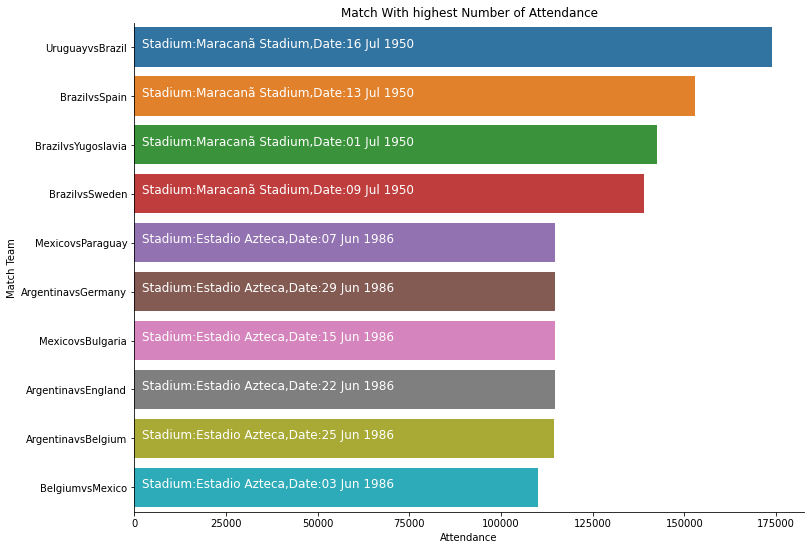

In [60]:
plt.figure(figsize=(12,9))

ax = sns.barplot(y=top10['vs'], x= top10['Attendance'])
sns.despine(right=True)
plt.ylabel('Match Team')
plt.xlabel('Attendance')
plt.title("Match With highest Number of Attendance")

for i, s  in enumerate("Stadium:" + top10['Stadium'] + ",Date:" + top10['Datetime']):
  ax.text(2000, i,s, fontsize= 12, color ="white")
plt.show()

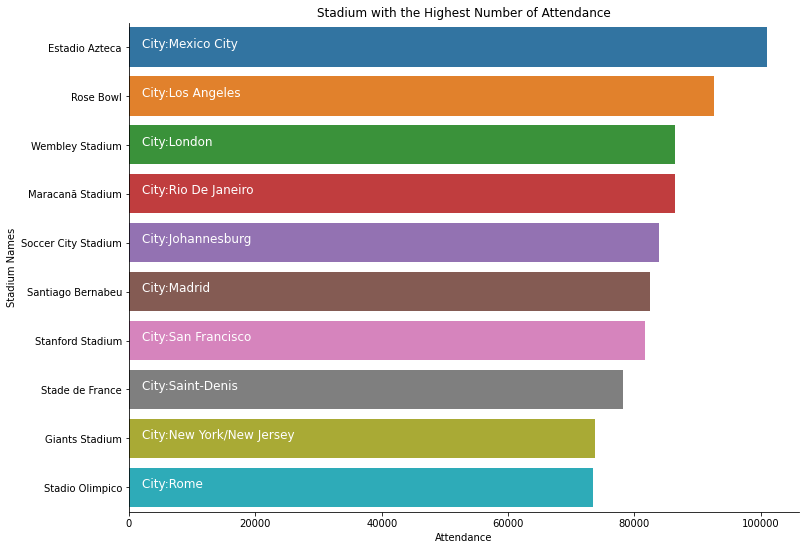

In [67]:
df_matches['Year'] = df_matches['Year'].astype(int)
std = df_matches.groupby(["Stadium","City"]).mean().reset_index().sort_values(by="Attendance", ascending= False)
top10 = std[:10]
plt.figure(figsize = (12,9))
ax = sns.barplot(y= top10['Stadium'], x= top10['Attendance'])
sns.despine(right=True)
plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title("Stadium with the Highest Number of Attendance")
for i, s  in enumerate("City:"  + top10['City']):
  ax.text(2000, i,s, fontsize= 12, color ="white")

plt.show()

In [69]:
enable_plotly_in_cell()

df_matches['City'].value_counts()[:20].iplot(kind="bar")

Output hidden; open in https://colab.research.google.com to view.

Match outcomes by home and away teams

In [74]:
def get_labels(matches):
  if matches['Home Team Goals'] > matches['Away Team Goals']:
    return 'Home Team Win'
  if matches['Home Team Goals'] < matches['Away Team Goals']:
    return 'Away Team Win' 
  return 'DRAW'
  
  


In [75]:
df_matches['outcomes'] = df_matches.apply(lambda x: get_labels(x), axis = 1)

In [76]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcomes
0,1930,13 Jul 1930,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930,13 Jul 1930,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930,14 Jul 1930,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930,14 Jul 1930,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930,15 Jul 1930,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [77]:
mt = df_matches['outcomes'].value_counts()
mt

Home Team Win    488
DRAW             190
Away Team Win    174
Name: outcomes, dtype: int64

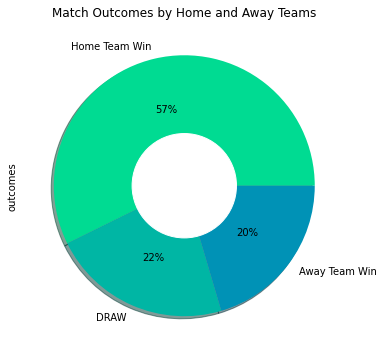

In [78]:
plt.figure(figsize = (6, 6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0, 0), 0.4, color = 'white')
#circle((x,y),radius, color)
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()